### 任务：
1. 基于chip_test.csv数据，建立多项式回归模型，评估模型表现
2. 绘制边界曲线

### 评估指标：
accuracy score

In [1]:
# 控制以允许JupyterNotebook多个输出
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
data_path = './datasets/05/chip_test.csv'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv(data_path)

In [5]:
data.head()

,test1,test2,pass
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,0.183760,0.93348,0


In [6]:
data = np.array(data)
X, y = data[:, :2], data[:, 2]

In [7]:
X.shape
y.shape

(118, 2)

(118,)

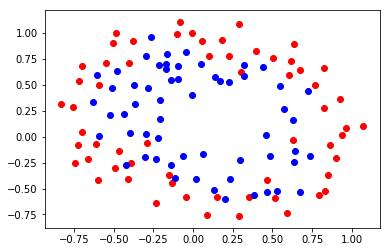

In [8]:
plt.scatter(X[y==0, 0], X[y==0, 1], color='r')
plt.scatter(X[y==1, 0], X[y==1, 1], color='b')
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2021)
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(88, 2)

(30, 2)

(88,)

(30,)

In [11]:
def create_pipeline(degree=2):
    return Pipeline([
        ('polynomial_features', PolynomialFeatures(degree=degree)),
        ('standard_scaler', StandardScaler()),
        ('logistic_regression', LogisticRegression())
    ])

In [12]:
poly_pipeline = create_pipeline(degree=4)

In [13]:
poly_pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('polynomial_features', PolynomialFeatures(degree=4, include_bias=True, interaction_only=False)), ('standard_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logistic_regression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [14]:
poly_pipeline.score(X_test, y_test)

0.8333333333333334

In [15]:
# 绘制决策边界
def plot_decision_boundary(model, axis, epsilon=500):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], epsilon).reshape(-1, 1),
        np.linspace(axis[2], axis[3], epsilon).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, cmap=custom_cmap)

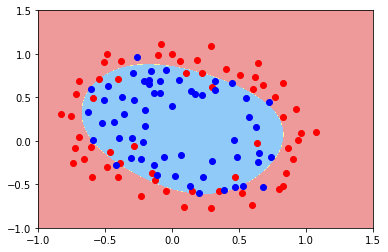

In [16]:
plot_decision_boundary(model=poly_pipeline, axis=[-1, 1.5, -1, 1.5])
plt.scatter(X[y==0, 0], X[y==0, 1], color='r')
plt.scatter(X[y==1, 0], X[y==1, 1], color='b')
plt.show()